<a href="https://colab.research.google.com/github/abotalebmostafa11/DL-System/blob/main/LSTMs_deaths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Deaths.csv to Deaths.csv


In [2]:
# LSTM for Forecasting Covid 19 problem In Russian Fderation
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.layers import Dense,RepeatVector,LSTM,Dropout,GRU,Dense,SimpleRNN,Embedding 
from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping
from tensorflow.keras.layers import Flatten, Conv1D, MaxPooling1D
from keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.layers import Bidirectional, Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, TimeDistributed
from keras.utils.vis_utils import plot_model
from keras.models import Model, load_model
from keras.layers import Dense, Softmax
from sklearn.metrics import r2_score
from keras.models import Sequential
import matplotlib.pyplot as plt
from pandas import read_csv
from numpy import array
import pandas as pd
import numpy as np
import numpy
import math

In [3]:
Data_Name="Deaths.csv"
Use_Percent = True
if Use_Percent:
    train_Percent = 0.95
else:
    Testing_Rows = 0
Forecasting_days = 10 # how many days that you want to forecast?
create_new_model = True
Time="days"
Implementation="Covid 19 daily deaths Cases in Russia"
plot_title="Modelling and forecasting deaths cases in Russia by using LSTMs (stacked lstm) Model "
Model_Name="stacked lstm"

In [4]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv(Data_Name, usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
if Use_Percent:
    train_size = int(len(dataset) * (train_Percent))
    test_size = len(dataset) - train_size
    pass
else:
    train_size = len(dataset) - Testing_Rows
    test_size = Testing_Rows
    pass

#train_size = int(len(dataset) * train_Percent)
#test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [5]:
look_back=int(input('LSTM for Regression Using the Window Method (increasing the look_back argument from 1 to 3)[№ look back]:'))
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
#trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
#testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX = numpy.reshape(trainX, (trainX.shape[0], look_back, 1))
testX = numpy.reshape(testX, (testX.shape[0], look_back, 1))
trainY = trainY.T
testY = testY.T
print(f'trainX = {trainX.shape}')
print(f'trainY = {trainY.shape}')
print(f'testX = {testX.shape}')
print(f'testY = {testY.shape}')

LSTM for Regression Using the Window Method (increasing the look_back argument from 1 to 3)[№ look back]:2
trainX = (795, 2, 1)
trainY = (795,)
testX = (39, 2, 1)
testY = (39,)


Machine learning software = => create and fit the stacked lstm for Regression network...
Enter the number of epochs:300
Enter the Loss Function:MeanSquaredError
Enter the Optimizer Name:adam
Enter the activation function name:relu
Enter the number of neurans:200
Epoch 1/300
636/636 [==============================] - 10s 10ms/step - loss: 0.0066 - accuracy: 0.1289 - val_loss: 5.7071e-04 - val_accuracy: 0.0126
Epoch 2/300
636/636 [==============================] - 6s 9ms/step - loss: 0.0021 - accuracy: 0.1289 - val_loss: 0.0014 - val_accuracy: 0.0126
Epoch 3/300
636/636 [==============================] - 6s 9ms/step - loss: 0.0020 - accuracy: 0.1289 - val_loss: 0.0034 - val_accuracy: 0.0126
Epoch 4/300
636/636 [==============================] - 6s 9ms/step - loss: 0.0017 - accuracy: 0.1289 - val_loss: 0.0021 - val_accuracy: 0.0126
Epoch 5/300
636/636 [==============================] - 5s 9ms/step - loss: 0.0017 - accuracy: 0.1289 - val_loss: 0.0014 - val_accuracy: 0.0126
Epoch 6/300
636/

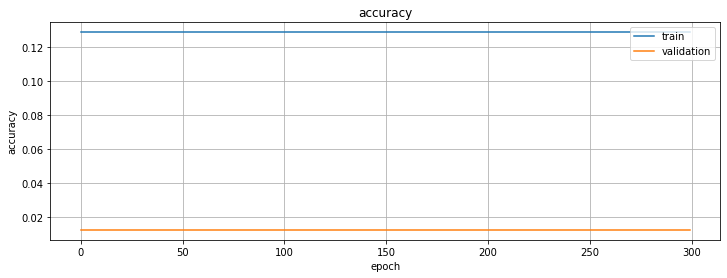

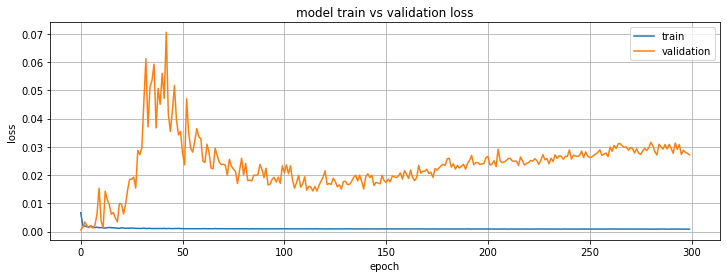

INFO:tensorflow:Assets written to: stacked lstm/assets


INFO:tensorflow:Assets written to: stacked lstm/assets


In [6]:
# %%
if create_new_model:
    model = Sequential()
    n_input = 12
    n_features= 1
    generator = TimeseriesGenerator(dataset, dataset, length=n_input, batch_size=n_features)
    early_stop = EarlyStopping(monitor = "loss", mode = "min", patience = 7)
    #for layer in Model_Name:
    if Model_Name.lower() == "bilstm":
        # create and fit the BILSTM for Regression network (bilstm)
        print('Machine learning software = => create and fit the BILSTM for Regression network...')
        N_epochs = int(input('Enter the number of epochs:'))
        inputloss_function =(input('Enter the Loss Function:'))
        inputoptimizer_name =(input('Enter the Optimizer Name:'))
        activation=(input('Enter the activation function name:'))
        NN=int(input('Enter the number of neurans:'))
        model.add(Bidirectional(LSTM(NN,activation=activation, input_shape=(look_back,1))))
        model.add(Dense(1))
    if  Model_Name.lower() == "stacked bilstm":
        # create and fit the BILSTM stack network (stacked bilstm)
        print('Machine learning software = => create and fit the stacked bilstm for Regression network...')
        N_epochs = int(input('Enter the number of epochs:'))
        inputloss_function =(input('Enter the Loss Function:'))
        inputoptimizer_name =(input('Enter the Optimizer Name:'))
        activation=(input('Enter the activation function name:'))
        NN=int(input('Enter the number of neurans:'))
        model.add(Bidirectional(LSTM(NN, return_sequences=True, activation=activation, input_shape=(look_back,1))))
        model.add(Bidirectional(LSTM(NN, return_sequences=True, activation=activation, input_shape=(look_back, 1))))
        model.add(Bidirectional(LSTM(20)))
        model.add(Dense(1))
    if  Model_Name.lower() == "convlstms":
        print('Machine learning software = => create and fit the convlstms for Regression network...')
        look_back=30
        trainX, trainY = create_dataset(train, look_back)
        testX, testY = create_dataset(test, look_back)
        # reshape input to be [samples, time steps, features]
        trainX = trainX.reshape(trainX.shape[0], trainX.shape[1],1)
        testX = testX.reshape(testX.shape[0], testX.shape[1],1)
        trainY = trainY.T
        testY = testY.T
        print(f'trainX = {trainX.shape}')
        print(f'trainY = {trainY.shape}')
        print(f'testX = {testX.shape}')
        print(f'testY = {testY.shape}')
        # create and fit the convlstms network (convlstms)
        N_epochs = int(input('Enter the number of epochs:'))
        inputloss_function =(input('Enter the Loss Function:'))
        inputoptimizer_name =(input('Enter the Optimizer Name:'))
        activation=(input('Enter the activation function name:'))
        model.add(Conv1D(filters=256, kernel_size=2, activation=activation, input_shape=(look_back,1)))
        model.add(Conv1D(filters=128, kernel_size=2, activation=activation))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Flatten())
        model.add(RepeatVector(30))
        model.add(LSTM(units=100, return_sequences=True, activation=activation))
        model.add(Dropout(0.2))
        model.add(LSTM(units=100, return_sequences=True, activation=activation))
        model.add(Dropout(0.2))
        model.add(LSTM(units=100, return_sequences=True, activation=activation))
        model.add(LSTM(units=100, return_sequences=True, activation=activation))
        model.add(Bidirectional(LSTM(128, activation=activation)))
        model.add(Dense(100, activation=activation))
        model.add(Dense(1))
    if  Model_Name.lower() == "conv":
        print('Machine learning software = => create and fit the convlstms for Regression network...')
        look_back=30
        trainX, trainY = create_dataset(train, look_back)
        testX, testY = create_dataset(test, look_back)
        # reshape input to be [samples, time steps, features]
        trainX = trainX.reshape(trainX.shape[0], trainX.shape[1],1)
        testX = testX.reshape(testX.shape[0], testX.shape[1],1)
        trainY = trainY.T
        testY = testY.T
        print(f'trainX = {trainX.shape}')
        print(f'trainY = {trainY.shape}')
        print(f'testX = {testX.shape}')
        print(f'testY = {testY.shape}')
        # create and fit the convlstms network (convlstm)
        N_epochs = int(input('Enter the number of epochs:'))
        inputloss_function =(input('Enter the Loss Function:'))
        inputoptimizer_name =(input('Enter the Optimizer Name:'))
        activation=(input('Enter the activation function name:'))
        model.add(Conv1D(filters=256, kernel_size=2, activation=activation, input_shape=(look_back,1)))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Flatten())
        model.add(Dense(100, activation=activation))
        model.add(Dense(1))
    if  Model_Name.lower() == "lstm":
        print('Machine learning software = => create and fit the lstm for Regression network...')
        # create and fit the LSTM for Regression network (lstm)
        N_epochs = int(input('Enter the number of epochs:'))
        inputloss_function =(input('Enter the Loss Function:'))
        inputoptimizer_name =(input('Enter the Optimizer Name:'))
        activation=(input('Enter the activation function name:'))
        NN=int(input('Enter the number of neurans:'))
        model.add(LSTM(NN,activation=activation, input_shape=(look_back,1)))
        model.add(Dense(1))
    if  Model_Name.lower() == "stacked lstm":
        print('Machine learning software = => create and fit the stacked lstm for Regression network...')
        # create and fit the Stacked LSTM for Regression network (stacked lstm)
        N_epochs = int(input('Enter the number of epochs:'))
        inputloss_function =(input('Enter the Loss Function:'))
        inputoptimizer_name =(input('Enter the Optimizer Name:'))
        activation=(input('Enter the activation function name:'))
        NN=int(input('Enter the number of neurans:'))
        model.add(LSTM(NN, return_sequences=True, activation=activation, input_shape=(look_back, 1)))
        model.add(LSTM(NN, return_sequences=True, activation=activation, input_shape=(look_back, 1)))
        model.add(LSTM(20))
        model.add(Dense(1))     
    if  Model_Name.lower() == "gru":
        print('Machine learning software = => create and fit the lstm for Regression network...')
        # create and fit the LSTM for Regression network (lstm)
        N_epochs = int(input('Enter the number of epochs:'))
        inputloss_function =(input('Enter the Loss Function:'))
        inputoptimizer_name =(input('Enter the Optimizer Name:'))
        activation=(input('Enter the activation function name:'))
        NN=int(input('Enter the number of neurans:'))
        model.add(GRU(NN,activation=activation, input_shape=(look_back,1)))
        model.add(Dense(1))
    model.compile(loss=inputloss_function, optimizer=inputoptimizer_name,metrics=['accuracy'])
    history =model.fit(trainX, trainY, epochs=N_epochs, batch_size=1, verbose=True,validation_split=0.2, shuffle=True)
    print(history.history.keys())
    #  "Accuracy"
    fig = plt.figure(figsize=(12,4))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.grid()
    plt.show()
    fig.savefig('Accuracy.png', dpi=fig.dpi, facecolor='white', bbox_inches='tight')
    # "Loss" # plot train and validation loss
    fig = plt.figure(figsize=(12,4))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model train vs validation loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.grid()
    plt.show()
    fig.savefig('plot train and validation loss.png', dpi=fig.dpi, facecolor='white', bbox_inches='tight')
    model.save(Model_Name)
else:
    model = load_model(Model_Name)
    model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 200)            161600    
                                                                 
 lstm_1 (LSTM)               (None, 2, 200)            320800    
                                                                 
 lstm_2 (LSTM)               (None, 20)                17680     
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 500,101
Trainable params: 500,101
Non-trainable params: 0
_________________________________________________________________


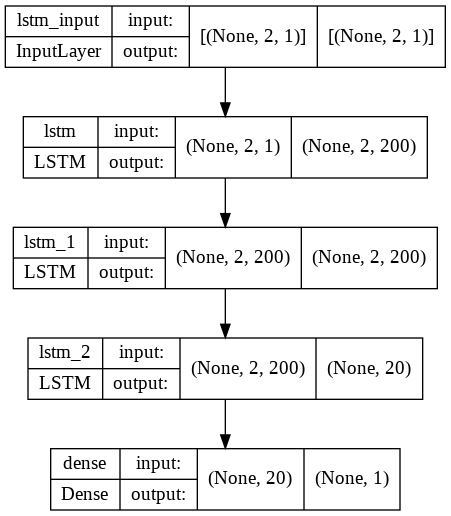

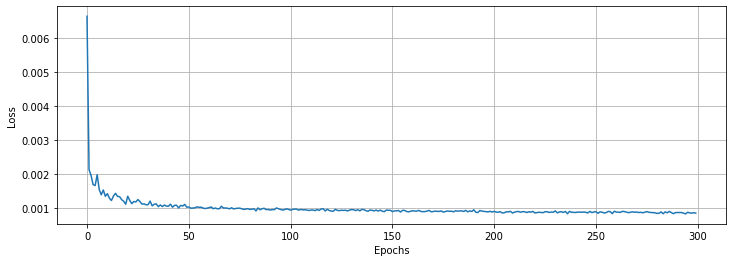

In [7]:
losses_lstm = model.history.history['loss']
fig = plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(range(len(losses_lstm)),losses_lstm)
plt.grid()
fig.savefig('losses lstm.png', dpi=fig.dpi, facecolor='white', bbox_inches='tight')
model.summary()
model.save('LSTM.h5')
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [8]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [9]:
# invert predictions
print(f'trainPredict {trainPredict.shape}')
print(f'trainY {trainY.shape}')
print(f'testPredict {testPredict.shape}')
print(f'testY {testY.shape}')
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainPredict (795, 1)
trainY (795,)
testPredict (39, 1)
testY (39,)


In [10]:
#Mean Squared Error
trainScore_MSE = mean_squared_error(trainY[0], trainPredict[:,0])
print('Train Score: %.2f MSE' % (trainScore_MSE))
testScore_MSE = mean_squared_error(testY[0], testPredict[:,0])
print('Test Score: %.2f MSE' % (testScore_MSE))
# calculate root mean squared error
trainScore_RMSE = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore_RMSE))
testScore_RMSE = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore_RMSE))
#  Mean Absolute Error
trainScore_MAE = mean_absolute_error(trainY[0], trainPredict[:,0])
print('Train Score: %.2f MAE' % (trainScore_MAE))
testScore_MAE = mean_absolute_error(testY[0], testPredict[:,0])
print('Test Score: %.2f MAE' % (testScore_MAE))
#  Mean Absolute Percentage Error
trainScore_MAPE = mean_absolute_percentage_error(trainY[0], trainPredict[:,0])
print('Train Score: %.2f MAPE' % (trainScore_MAPE))
testScore_MAPE = mean_absolute_percentage_error(testY[0], testPredict[:,0])
print('Test Score: %.2f MAPE' % (testScore_MAPE))

#  Coefficient of Determination-R2 score
trainScore_r2 = r2_score(trainY[0], trainPredict[:,0])
print('Train Score: %.2f r2' % (trainScore_r2))
testScore_r2= r2_score(testY[0], testPredict[:,0])
print('Test Score: %.2f r2' % (testScore_r2))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

Train Score: 9731.20 MSE
Test Score: 2681.00 MSE
Train Score: 98.65 RMSE
Test Score: 51.78 RMSE
Train Score: 54.25 MAE
Test Score: 47.84 MAE
Train Score: 4464755024724792.50 MAPE
Test Score: 0.15 MAPE
Train Score: 0.92 r2
Test Score: 0.78 r2


In [11]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

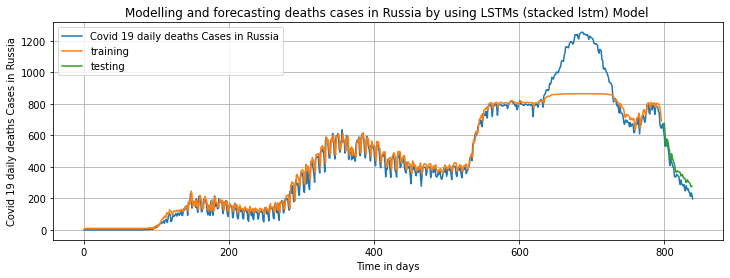

In [12]:
# plot baseline and predictions
fig = plt.figure(figsize=(12,4))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title(plot_title) 
plt.legend([Implementation, 'training','testing'], loc='upper left')
plt.xlabel(f'Time in {Time}')
plt.ylabel(Implementation)
plt.grid()
plt.show()
fig.savefig('final.png', dpi=fig.dpi, facecolor='white', bbox_inches='tight')

In [13]:
# predictions = model.predict() #this creates states
future_x = []
future_y = []
currentStep = dataset[-look_back:] #last step from the previous prediction
# model.reset_states()
for i in range(Forecasting_days):
    predicted = model.predict(currentStep.reshape(1,look_back,1)) #get the next step
    future_x.append(currentStep) #store the future steps \
    future_y.append(predicted)
    future_y[i] = np.reshape(scaler.inverse_transform(future_y[i]), 1)
    currentStep = np.concatenate((currentStep[1:], predicted), axis=0).astype(np.float32)
future_predictions_x = pd.DataFrame(np.array(future_x).reshape(Forecasting_days,look_back))
future_predictions_y = pd.DataFrame(future_y,columns=['Future'])
# print(future_predictions_x)
print(future_predictions_y)

       Future
0  248.180313
1  275.533142
2  302.637604
3  332.135406
4  360.736176
5  379.932220
6  391.567139
7  404.483978
8  420.462921
9  438.680878


In [14]:
file1 = open('Accuracy.txt', 'w')
file1.write(f'Train Score r2 %.2f : {trainScore_r2}\n Test Score r2 %.2f r2: {testScore_r2}\n Train Score MSE: {trainScore_MSE}\n Test Score MSE: {testScore_MSE}\n Train Score RMSE: {trainScore_RMSE}\n test Score RMSE: {testScore_RMSE}\n Train Score MAE: {trainScore_MAE}\n Test Score MAE: {testScore_MAE}\n Train Score MAPE: {trainScore_MAPE}\n Test Score MAPE: {testScore_MAPE}')
file1.close()

In [15]:
file2 = open('Prediction.txt', 'w')
file2.write(f'Prediction:\n {future_predictions_y}')
file2.close()

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
